C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\camer\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters found:  {'max_depth': 15, 'max_features': 5, 'n_estimators': 150, 'verbose': 0}
Accuracy: 0.85270
                    precision    recall  f1-score   support

00:17:88:47:20:f2:       0.55      0.67      0.60       102
00:1b:c7:fa:c3:e6:       1.00      1.00      1.00      2184
00:22:cf:fd:c1:08:       0.95      0.58      0.72        31
00:a2:b2:b9:09:87:       0.99      0.98      0.99      1255
04:5d:4b:a4:d0:2e:       0.75      0.98      0.85      3849
34:76:c5:7f:91:07:       0.64      0.98      0.77      2150
34:ea:34:76:ea:68:       0.83      0.86      0.85        35
38:56:10:00:1d:8c:       0.00      0.00      0.00      2348
40:9f:38:e7:7f:09:       0.80      0.53      0.64        15
48:d6:d5:92:96:a2:       0.81      0.72      0.76       626
4c:ef:c0:17:e0:42:       0.99      0.92      0.95       424
60:01:94:54:6b:e8:       0.00      0.00      0.00         8
6c:5a:b5:56:39:3e:       0.95      0.98      0.97      4727
70:26:05:73:6e:31:       0.88      0.86      

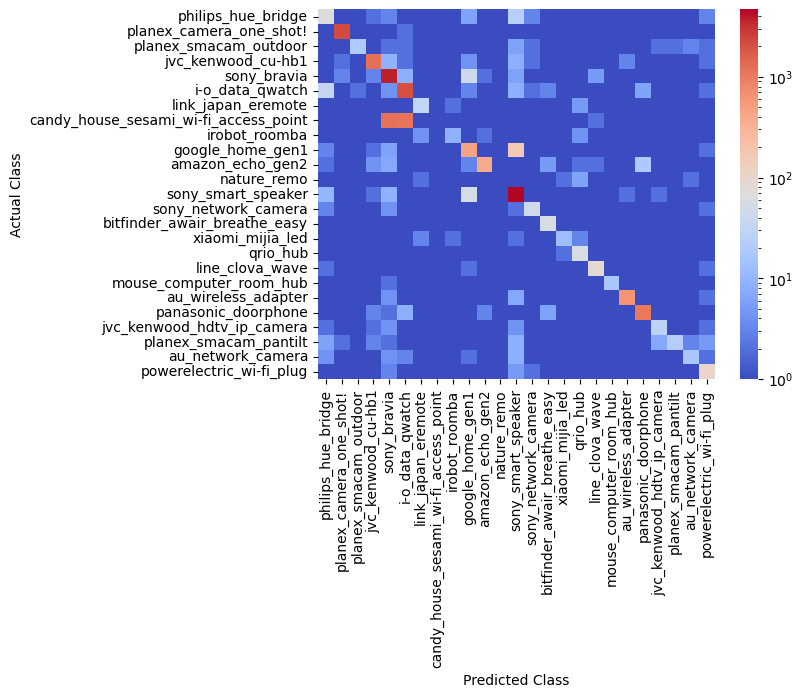

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Tue Oct 29 11:59:39 2024

@author: camer
"""

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from time import time
start_time = time()
seed = 42
test_size = 0.2
column_names = [
    "name", "start_date", "start_time", "duration", "reverseDelta", "IoTMac", "hostMac", 
    "IoTIP", "IoTIP_int", "hostIP", "hostIP_int", "ipProto", "IoTPort", "hostPort", 
    "PacketCount", "BytesCount", "reversePacketCount", "reverseBytesCount", "SmallPktCount", 
    "LargePktCount", "NonEmptyPktCount", "DataByteCount", "AvgIAT", "FirstNonEmptyPktSize", 
    "MaxPktSize", "StdevPayloadSize", "StdevIAT", "AvgPacketSize", "reverseSmallPktCount", 
    "reverseLargePktCount", "reverseNonEmptyPktCount", "reverseDataByteCount", "reverseAvgIAT", 
    "PktSize", "reverseMaxPktSize", "reverseStdevPayloadSize", "reverseStdevIAT", 
    "reverseAvgPacketSize", "reverseFlowExists", "remote", "broadcast", "HTTP", "HTTPS", "DNS", 
    "NTP", "TCP_others", "UDP_others", "year_month"
]

headers=["philips_hue_bridge",
"planex_camera_one_shot!",
"planex_smacam_outdoor",
"jvc_kenwood_cu-hb1",
"sony_bravia",
"i-o_data_qwatch",
"link_japan_eremote",
"candy_house_sesami_wi-fi_access_point",
"irobot_roomba",
"google_home_gen1",
"amazon_echo_gen2",
"nature_remo",
"sony_smart_speaker",
"sony_network_camera",
"bitfinder_awair_breathe_easy",
"xiaomi_mijia_led",
"qrio_hub",
"line_clova_wave",
"mouse_computer_room_hub",
"au_wireless_adapter",
"panasonic_doorphone",
"jvc_kenwood_hdtv_ip_camera",
"planex_smacam_pantilt",
"au_network_camera"
,"powerelectric_wi-fi_plug"
]

df_train = pd.read_csv("train.csv", names=column_names)
df_test = pd.read_csv("test.csv",names=column_names)

target_columns = ['IoTMac']
y_train = df_train.filter(items = target_columns)
X_train = df_train.drop(['name','start_date', 'start_time', 'year_month','IoTIP', 'IoTIP_int', 'hostMac', 'IoTMac', 'hostIP', 'hostIP_int'], axis=1)

y_test = df_test.filter(items = target_columns)
X_test = df_test.drop(['name','start_date', 'start_time', 'year_month','IoTIP', 'IoTIP_int', 'hostMac', 'IoTMac', 'hostIP', 'hostIP_int'], axis=1)

# Split the dataset into training and test sets (80% train, 20% test)
#X_train, X_test, y_train, y_test = train_test_split(X, y.values.ravel(), test_size=test_size, random_state=seed)

#Create a random forest model (we found 25 esimators was best)

parameters = param_grid = {
    'max_features': [5],
    'max_depth': [15], # -1 means unlimited
    'n_estimators': [150],
    'verbose': [0]
}
grid = GridSearchCV(RandomForestClassifier(random_state=seed), param_grid, cv=3, scoring='neg_log_loss', n_jobs=-1)
grid.fit(X_train, y_train)
bestParamsModel = grid.best_estimator_
bestParamsModel.fit(X_train, y_train)

# Make predictions and evaluate the model

y_pred = bestParamsModel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
y_test2 = y_test['IoTMac']
print("Best parameters found: ", grid.best_params_)
print(f'Accuracy: {accuracy:.5f}')
print(classification_report(y_test2, y_pred, zero_division=0))
cmatrix = confusion_matrix(y_test, y_pred)
for f in cmatrix:
    f += 1
import seaborn as sns
from matplotlib.colors import LogNorm
sns_map = sns.heatmap(cmatrix, annot=False, cmap='coolwarm', norm=LogNorm())
sns_map.set_xlabel('Predicted Class')
sns_map.set_ylabel('Actual Class')
sns_map.xaxis.set_ticklabels(headers)
sns_map.tick_params(axis='y',rotation=0)
sns_map.set_yticks(np.arange(25)+0.5)
sns_map.yaxis.set_ticklabels(headers)
crosstab = pd.crosstab(y_test2,y_pred,rownames=['True'],colnames=['Predicted'],margins=True)
print(time() - start_time)